library

In [1]:

import numpy as np
import pandas as pd
import sys
import json
from datetime import datetime, timedelta, date
import copy
import sys
import sklearn


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid


exponentially decreasing weight

In [2]:

w=0.90

expo_list=list()
for i in range(0,80):
  expo_list.append((np.power(w,i))/((1-np.power(w,80))/(1-w)))


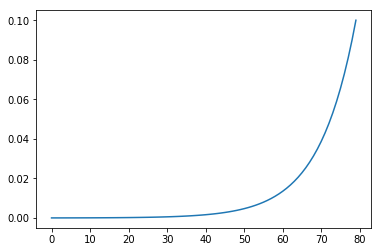

In [3]:
# fraction = 0.1
fig, ax = plt.subplots()
ax.plot(expo_list[::-1])

In [4]:
def weighted_variance(values, weights):
    """
    Return the weighted average and standard deviation.
    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return variance

In [5]:
def ndiffs(value, seasonal_parameter):
  fordiff=value[::-1]
  ndiffs_list=list()
  for i in range(0, len(fordiff)-seasonal_parameter):
    ndiffs_list.append(fordiff[i]-fordiff[i+seasonal_parameter])
  return ndiffs_list

extract exponentially decreasing weight variance

In [6]:
tsvalue = timeseries_value
theta=0.1
w=1-theta

# seasonal diffrenciation
diff_value=np.diff(tsvalue)
seasonal_diff_value=ndiffs(diff_value,seasonal_parameter)

# 가중표본분산
length_data=len(seasonal_diff_value)
expo_list=list()

for k in range(0,length_data):
    expo_list.append((np.power(w,k))/((1-np.power(w,length_data))/(1-w)))

weight_variance = weighted_variance(seasonal_diff_value, expo_list)